# Comparing the Value of Draft Picks in the NHL 
## (Low 1st Round Picks vs. High 2nd Round Picks)

#### Data Analysis by Minchan Han


## Approach: We will start by setting some standards

  * This dataset will include drafts from 1992-93 season to the 2004-05 season (inclusive), as many players drafted in the 2005-06 draft are still active, meaning their GP (Games Played) is still increasing

#### The drafts will then include at least 26 teams, (Florida and Anaheim were introduced as the 25th and 26th teams for the start of the 1993-94 season), meaning the 1992-93 draft is the best place to start, as we try to mimic the modern draft (with 31 teams) and collect enough data to train our model (the next franchise being introduced in 1998).

##### Note: Drafts occur at the end of the season, so the 1992-93 draft was held in 1993, meaning our first draft is the 1993 draft

#### We will export data from Hockey-Reference.com in this fashion:
  * OUR MAIN DATA: The 16th - 45th overall picks will be taken from each draft (15 from each round), the 16th-30th picks representing the low 1st Round Picks and the 31st - 45th picks representing the high 2nd Round Picks. 
  
  * The Round # that these overall picks belong to vary between 1993 and 2020 but, for example, even though the 1st Round only went to the the 26th pick in 1993, we will treat the 27th - 30th picks that year (and every year) as a modern day 1st Round Pick for simplicity
   
  * The Top 15 picks and 46th - 90th overall picks were also collected to compare them to our "main" 16th - 45th picks later on in our analysis

### NOTE: For this analysis unless otherwise stated, I will refer to the 15th - 30th picks as "Low 1st Round Picks" and the 31st - 45th picks as the "High 2nd Round Picks"

  * We will also assess a draft pick's value based on their Games Played (GP) because regardless of a player's playing stats, if they are playing on an NHL roster, it is because they have value, and we are measuring the value of the players chosen within the 15th - 45th overall picks
  
  * Goalies will be excluded from this study as they play in fewer games than skaters

## The questions we want to answer are:
### 1. Are high 2nd Round Picks just as valuable as low 1st Round Picks? Should General Managers be more willing to trade low 1st Round Picks?
### 2. Is there any truth to the theory that beyond the very top picks of the draft, every draft pick is worth the same? Do they provide the same chance of producing a valuable player?

### We will analyze our data to try and answer our questions and at the end, for fun we will train a predictive model to try and predict which players drafted from 16th - 45th from the 2006-10 drafts will reach how many games based on where they were drafted!

# Part 1 - Data Analysis
## Step 1: Import Libraries/Data

##### (Descriptions are the Draft Finder Filters on Hockey-Reference.com)
 * list93-05-top15.csv: http://hkref.com/tiny/cL2lg
 * list93-05-16to45.csv: http://hkref.com/tiny/2bsqE 
 * list93-05-46to90.csv: http://hkref.com/tiny/4xHMu
 * list06-10.csv: http://hkref.com/tiny/R99lE 

In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
from IPython.display import display_html
from IPython.display import display, HTML

In [2]:
# Our main data, 16th to 45th Overall Picks
data = pd.read_csv("list93-05-16to45.csv")
# Now we have to remove all the Goalies from these files
data = data[data.Pos != "G"]

#### (33 Goalies have been removed between the 16th and 45th picks, there are 357 skaters remaining as you will see in the following displays)

## Step 2: Organize Data for Initial Analysis

In [3]:
# Let's take a quick look at this data now
display(data)
display(data.describe())

,Year,Round,Overall,Team,Player,Nat.,Pos,Age,To,Amateur Team,Amateur Lg.,NHL,GP,G,A,PTS,+/-,PIM
0,1993,1,16,Edmonton Oilers,Nick Stajduhar\stajdni01,CA,D,18.0,1996.0,London,OHL,x,2.0,0.0,0.0,0.0,2.0,4.0
3,1996,1,16,Tampa Bay Lightning,Mario Larocque\larocma01,CA,D,18.0,1999.0,Hull,QMJHL,x,5.0,0.0,0.0,0.0,-4.0,16.0
4,1997,1,16,Chicago Blackhawks,Ty Jones\jonesty01,US,RW,18.0,2004.0,Spokane,WHL,x,14.0,0.0,0.0,0.0,-1.0,19.0
5,1998,1,16,Montreal Canadiens,Eric Chouinard\chouier01,US,LW,18.0,2006.0,Quebec,QMJHL,x,90.0,11.0,11.0,22.0,-8.0,16.0
6,1999,1,16,Carolina Hurricanes,David Tanabe\tanabda01,US,D,19.0,2008.0,Wisconsin,WCHA,x,449.0,30.0,84.0,114.0,-47.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2001,2,45,Phoenix Coyotes,Martin Podlesak,CZ,C,18.0,NaN,Lethbridge,WHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,2002,2,45,Montreal Canadiens,Tomas Linhart,CZ,D,18.0,NaN,Pardubice Jr.,Czech-Jr.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,2003,2,45,Boston Bruins,Patrice Bergeron\bergepa01,CA,C,18.0,2020.0,Acadie-Bathurst,QMJHL,x,1089.0,352.0,517.0,869.0,201.0,424.0
388,2004,2,45,Chicago Blackhawks,Ryan Garlock,CA,C,18.0,NaN,Windsor,OHL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Year,Round,Overall,Age,To,GP,G,A,PTS,+/-,PIM
count,357.000000,357.000000,357.000000,314.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,1998.971989,1.565826,30.462185,18.210191,2009.361404,365.589474,52.915789,90.891228,143.807018,-1.045614,273.722807
std,3.712914,0.496344,8.671395,0.559916,6.212713,359.495191,82.945977,132.304142,210.354483,36.493411,329.747124
min,1993.000000,1.000000,16.000000,18.000000,1994.000000,1.000000,0.000000,0.000000,0.000000,-108.000000,0.000000
25%,1996.000000,1.000000,23.000000,18.000000,2004.000000,46.000000,1.000000,3.000000,6.000000,-16.000000,22.000000
50%,1999.000000,2.000000,31.000000,18.000000,2009.000000,245.000000,16.000000,31.000000,51.000000,-3.000000,137.000000
75%,2002.000000,2.000000,38.000000,18.000000,2014.000000,615.000000,66.000000,123.000000,188.000000,3.000000,407.000000
max,2005.000000,2.000000,45.000000,23.000000,2020.000000,1516.000000,386.000000,691.000000,965.000000,201.000000,1732.000000


#### Columns:
#### Year = Drafted Year
#### Round = Drafted Round Number (1 - 30 is 1st round, 31 - 60 is 2nd round. In our data, we are of course, ommitting the top half of the 1st round and bottom half of the 2nd round)
#### Overall = The Order a Player has been drafted in the entire draft, regardless of Round #
#### Age = Player's Draft Age 
#### To = Final Year a Player has played (NaN if they haven't played a game, 2020 if they are still playing currently)
#### GP = Games Played
#### G = Goals
#### A = Assists
#### PTS = Points (G + A)
#### PIM = Penalties in Minutes
###### +/- will be excluded

#### We can see many columns we want to remove. We can also see that all the missing values (NaN) in our data can be replaced with a 0. For example GP shouldn't be NaN if a player has no data under GP, it should be 0.
#### The columns we want for now are Round, Overall, To, Age, GP, G, A, PTS, +/-, PIM. 

  * We need Round, and Overall for obvious reasons, we are trying to analyze the value of the draft pick # and the Round #
  * The To column is for if they are retired, still playing, or haven't played a game
  * The Year column is for temporary organization
  * We are going to look at the rest of the playing stats to see if there are any other correlations we can see between the playing stats and longevity


### Organize Columns

In [4]:
# First lets restrict our data to the columns we need
columns = ["Year", "Round", "Overall", "To", "Age", "GP", "G", "A", "PTS", "+/-", "PIM"]
data = data[columns]

# Now since all of these features are numbers or NaN, we can turn every NaN into 0.0
# Note: this will turn the NaN of "To" to 0, luckily the value doesn't matter as we will just use the "To" column to create a new column called "Status" soon
data = data.fillna(0, downcast="infer")

# Let's change the Ages not recorded by Hockey-Reference which were turned from NaN to 0 to the most common draft pick age, which is 18 for simplicity
print("Before converting Age 0 -> 18: ")
display(data.groupby("Age").size())
data.loc[data.Age == 0, "Age"] = 18

Before converting Age 0 -> 18: 


Age
0      43
18    262
19     43
20      7
22      1
23      1
dtype: int64

### We will also create a new column called "Status" for if they haven't debuted (0), are still playing (1), or have retired (2).

In [5]:
def assignStatus(row):
    if row.To == 0: # Haven't Debuted
        return 0
    elif row.To == 2020: # Still Playing
        return 1
    else:   # Retired
        return 2

data["Status"] = data.apply(lambda row: assignStatus(row), axis = 1)
display(data.head(3))

statusseries = data.groupby("Status").size()
statusseries.name = "Count"
statusdf = statusseries.to_frame()
statusdf.reset_index(inplace=True)

status_styler = statusdf.style.set_table_attributes("style='display:inline'")

print("\n\nNumber of players by Status: ")
display_html(status_styler.render(), raw = True)
display(HTML(statusdf.to_html()))
display(statusdf.style)



,Year,Round,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
0,1993,1,16,1996,18,2,0,0,0,2,4,2
3,1996,1,16,1999,18,5,0,0,0,-4,16,2
4,1997,1,16,2004,18,14,0,0,0,-1,19,2




Number of players by Status: 


,Status,Count
0,0,72
1,1,19
2,2,266


,Status,Count
0,0,72
1,1,19
2,2,266


,Status,Count
0,0,72
1,1,19
2,2,266


#### It looks like we do have 19 players that are still playing in 2020 (Status = 1), but it shouldn't affect our analysis because 1) The players are nearing the end of their long careers and 2) It is unlikely that in 15 years of playing, that they have not already reached Level 5 (750 games)

#### In fact we can see that every single one of the 19 players but one has reached 750 games, and that player is at 739 GP

In [6]:
display(data[data["Status"] == 1])

,Year,Round,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
23,2003,1,17,2020,19,1015,386,406,792,71,378,1
49,2003,1,19,2020,18,1053,274,691,965,130,888,1
62,2003,1,20,2020,18,1113,210,484,694,-7,685,1
63,2004,1,20,2020,19,991,195,337,532,-19,338,1
113,2002,1,24,2020,18,1018,245,377,622,42,454,1
116,2005,1,24,2020,18,803,238,329,567,126,402,1
129,2005,1,25,2020,18,1012,165,234,399,40,345,1
140,2003,1,26,2020,18,805,130,101,231,-48,588,1
157,2000,1,28,2020,18,1264,320,477,797,110,766,1
160,2003,1,28,2020,18,1045,377,420,797,74,1180,1


### And finally, as mentioned before, we will treat all 27, 28, 29, and 30th picks as first rounders
##### (1st Round = 1-30 | 2nd Round = 31-60)

In [7]:
def assignAdjustedRound(row):
    if row.Overall <= 30:
        return 1
    else:
        return 2

data["AdjRound"] = data.apply(lambda row: assignAdjustedRound(row), axis = 1)
column_order = ["Year", "AdjRound", "Overall", "To", "Age", "GP", "G", "A", "PTS", "+/-", "PIM", "Status"]
data = data.reindex(columns=column_order)
print("\nNew AdjRound Column: ")
display(data.loc[(data["Overall"] >= 27) & (data["Overall"] <= 30)].head(3)) 
display(data.loc[(data["Overall"] >= 27) & (data["Overall"] <= 30)].tail(3)) 
# Fun Fact: 17 Goalies were drafted in our Adjusted 1st Round and 16 were drafted in our Adjusted 2nd Round! As even as it gets, wow!


New AdjRound Column: 


,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
143,1998,1,27,2016,18,1079,181,575,756,-1,655,2
144,1999,1,27,0,18,0,0,0,0,0,0,0
145,2000,1,27,2004,18,14,0,1,1,-2,2,2


,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
191,1996,1,30,2012,18,341,36,40,76,-16,206,2
193,1998,1,30,2004,18,11,0,1,1,-3,9,2
194,1999,1,30,2002,18,1,0,0,0,0,2,2


## Step 3: Observe Data
### Before we observe our main data, we will import our other data (Top 15 picks and 46th - 90th picks)


In [8]:
datatop = pd.read_csv("list93-05-top15.csv") # Top 15
datalow = pd.read_csv("list93-05-46to90.csv") # Low Picks: 46th to 90th
datatop = datatop[datatop.Pos != "G"]
datalow = datalow[datalow.Pos != "G"]
datatop = datatop[columns]
datalow = datalow[columns]
datatop = datatop.fillna(0, downcast="infer")
datalow = datalow.fillna(0, downcast="infer")
datatop.loc[datatop.Age == 0, "Age"] = datalow.loc[datalow.Age == 0, "Age"] = 18
datatop["Status"] = datatop.apply(lambda row: assignStatus(row), axis = 1)
datalow["Status"] = datalow.apply(lambda row: assignStatus(row), axis = 1)
datatop["AdjRound"] = datatop.apply(lambda row: assignAdjustedRound(row), axis = 1)
datalow["AdjRound"] = datalow.apply(lambda row: assignAdjustedRound(row), axis = 1)
datatop = datatop.reindex(columns=column_order)
datalow = datalow.reindex(columns=column_order)

completedata = pd.concat([datatop, data, datalow], ignore_index=True, keys=["datatop", "data", "datalow"]) # Combine all data
display(completedata)

,Year,AdjRound,Overall,To,Age,GP,G,A,PTS,+/-,PIM,Status
0,1993,1,1,2006,18,616,129,198,327,-176,186,2
1,1994,1,1,2014,18,1128,137,363,500,-86,1491,2
2,1995,1,1,2008,18,619,76,247,323,-98,500,2
3,1996,1,1,2015,18,1179,71,217,288,68,756,2
4,1997,1,1,2020,18,1636,420,1089,1509,186,1248,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1993,2,90,2006,18,601,226,172,398,8,176,2
1081,1994,2,90,2011,18,658,23,90,113,45,369,2
1082,1996,2,90,0,18,0,0,0,0,0,0,0
1083,1997,2,90,0,18,0,0,0,0,0,0,0



Mean GP in Low 1st Round: 373.9157303370786

Mean GP in High 2nd Round: 210.25698324022346



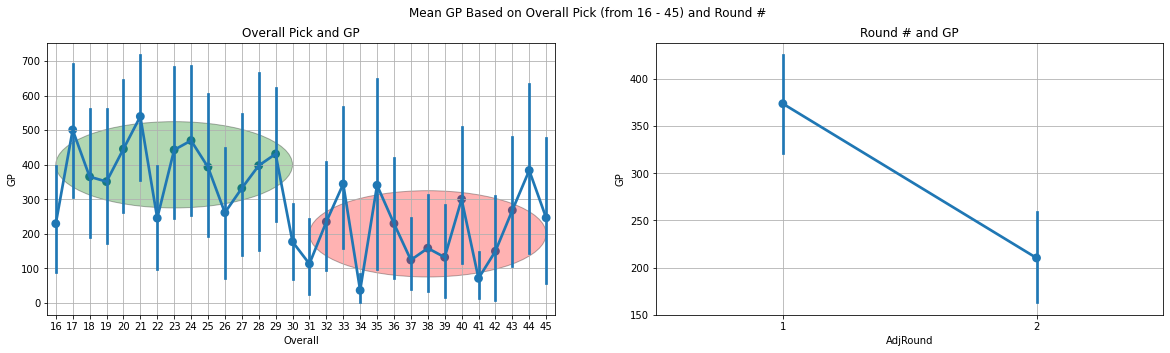

In [9]:
# Since the main thing we are focusing on is the correlation between Overall draft pick #, Round # (AdjRound) and GP, we will try to graph some data using those values

gpround1 = (data.loc[data["AdjRound"] == 1])["GP"].mean()
gpround2 = (data.loc[data["AdjRound"] == 2])["GP"].mean()
print("\nMean GP in Low 1st Round: " + str(gpround1) + "\n")
print("Mean GP in High 2nd Round: " + str(gpround2) + "\n")


fig, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title("Overall Pick and GP")
axs[1].set_title("Round # and GP")
axs[0].add_patch(patches.Ellipse((7, 400), 14, 250, alpha=0.3, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid' ))
axs[0].add_patch(patches.Ellipse((22, 200), 14, 250, alpha=0.3, facecolor="red", edgecolor="black", linewidth=1, linestyle='solid' ))

fig.suptitle("Mean GP Based on Overall Pick (from 16 - 45) and Round #")
sns.pointplot(x="Overall", y="GP", data=data, ax=axs[0]).grid(True)
sns.pointplot(x="AdjRound", y="GP", data=data, ax=axs[1]).grid(True)

#### Our graph shows an interesting result. It appears that the low 1st Round and high 2nd Round are basically separated into two clusters, with the low 1st Round Picks containing more GP the high 2nd Round Picks by a large margin. The mean GP for the low 1st round is 374, while the mean for the high 2nd round is 210!

#### This is surprising because there really shouldn't be any reason for this division between the low 1st Round Picks and high 2nd Round Picks! Why would the difference between the 25th pick and the 35th pick be so significant?

#### It's especially interesting that instead of a gradual decrease of GP as the overall pick numbers increase in each round, the points seem to be scattered randomly between the 16th and 30th picks. Same result with the 31st to 45th picks. Do these clusters show us an answer to our 1st question? Are low 1st Round Picks that much more valuable than high 2nd Round Picks as a CLASSIFICATION?

#### As for our second question, if all the draft picks past the top 15 are worth the same, we can't answer yet, but it does appear that the order in their respective rounds don't seem to matter too much. Every pick between 16 and 30 have produced similar players and every pick between 31 and 45 have produced similar players.



Players with minimum 450 GP: 

31st - 45th: 36

46th - 60th: 30

61st - 75th: 32

76th - 90th: 21




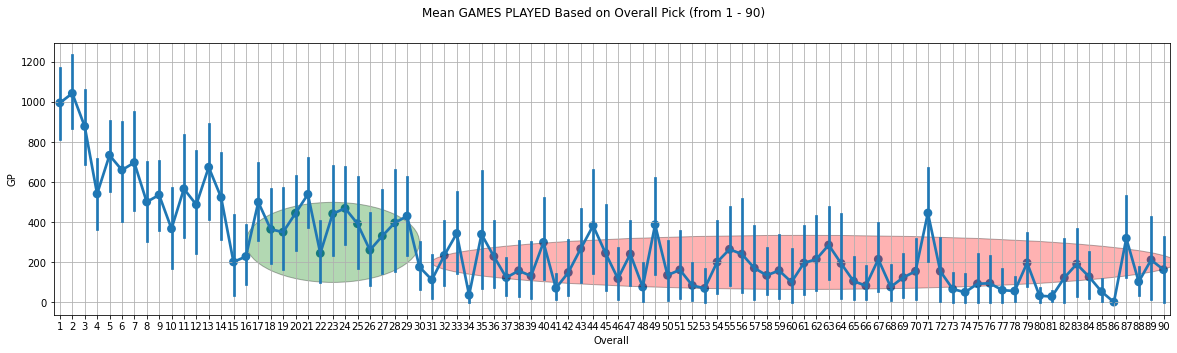

In [10]:
# We will take a look at our complete data from the 1st pick to 90th pick to see if there are similar trends
fig, axs = plt.subplots(1, 1, figsize=(20,5))

fig.suptitle("Mean GAMES PLAYED Based on Overall Pick (from 1 - 90)")
sns.pointplot(x="Overall", y="GP", data=completedata, ax=axs).grid(True)
axs.add_patch(patches.Ellipse((22, 300), 14, 400, alpha=0.3, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid' ))
axs.add_patch(patches.Ellipse((60, 200), 60, 270, alpha=0.3, facecolor="red", edgecolor="black", linewidth=1, linestyle='solid' ))

high2nd = data.loc[(data["AdjRound"] == 2) & (data["GP"] >= 450)] # 31 - 45
from46to60 = completedata.loc[(completedata["Overall"] >= 46)&(completedata["Overall"] <=60)&(completedata["GP"] >= 450)] # 46 - 60
from61to75 = completedata.loc[(completedata["Overall"] >= 61)&(completedata["Overall"] <=75)&(completedata["GP"] >= 450)] # 61 - 75
from76to90 = completedata.loc[(completedata["Overall"] >= 76)&(completedata["Overall"] <=90)&(completedata["GP"] >= 450)] # 76 - 90

print("\n\nPlayers with minimum 450 GP: ")
print("\n31st - 45th: " + str(len(high2nd)))
print("\n46th - 60th: " + str(len(from46to60)))
print("\n61st - 75th: " + str(len(from61to75)))
print("\n76th - 90th: " + str(len(from76to90)) + "\n\n")

#### This time we looked at Games Played to get a wider range on the y-axis, as our x-axis increases as well.
#### We can observe that we see our usual Low 1st Round picks being randomly clustered together, with the same drop off into the High 2nd Round. However, we can see that all the picks 45+ are very similar as well, creating its own cluster combining with the High 2nd Round picks!

#### We can also see that the top 15 picks are clearly on a class of their own. 

#### This shows us 
  1. The Top 15 picks are exponentially higher in value than the rest of the draft, and the order does appear to matter amongst these picks, creating a gradual decrease as the picks incerase
  2. The Low 1st Round Picks (16-30) are on a slightly higher tier from the rest of the draft but the order amongst themselves do not appear to be important
  3. We can see from our table "Players with minimum 450 GP" and the graph that from the 2nd Round onwards, most of the picks appear to be of the same value, but with fewer high spikes in GP as the picks increase

In [11]:
over750inround1 = data.loc[(data["GP"] >= 750) & (data["Overall"] <= 30)].groupby("Overall").size()
over750inround2 = data.loc[(data["GP"] >= 750) & (data["Overall"] >= 31)].groupby("Overall").size()

over750inround1.name = over750inround2.name = 'Count'
over750inround1df = over750inround1.to_frame()
over750inround2df = over750inround2.to_frame()
over750inround1df.reset_index(inplace=True)
over750inround2df.reset_index(inplace=True)



over750r1 = over750inround1df.style.set_table_attributes("style='display:inline'")
over750r2 = over750inround2df.style.set_table_attributes("style='display:inline'")

print("\n\nNumber of players who have reached 750 GP -> Low Round 1 | High Round 2: ")
display_html(over750r1.render() + "  " + over750r2.render(), raw = True)

print("\n\nPlayers with 750 GP from the 16th - 23rd pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 16) & (data["Overall"] <= 23)])))
print("Players with 750 GP from the 24th - 30th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 24) & (data["Overall"] <= 30)])))

print("\n\nPlayers with 750 GP from the 31st - 38th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 31) & (data["Overall"] <= 38)])))
print("Players with 750 GP from the 39th - 45th pick: " + str(len(data[(data["GP"] >= 750) & (data["Overall"] >= 39) & (data["Overall"] <= 45)])))




Number of players who have reached 750 GP -> Low Round 1 | High Round 2: 


,Overall,Count
0,16,1
1,17,4
2,18,2
3,19,2
4,20,2
5,21,2
6,22,1
7,23,3
8,24,4
9,25,3




Players with 750 GP from the 16th - 23rd pick: 17
Players with 750 GP from the 24th - 30th pick: 17


Players with 750 GP from the 31st - 38th pick: 8
Players with 750 GP from the 39th - 45th pick: 8


#### We find other interesting pieces of data here because we can see again that at least one player has reached 750 games from every single low 1st round pick spot except for #30!
#### But we can see that 6 out of the 15 of the high 2nd Round Picks have not produced a single player that has reached 750 games!

#### And again it's fascinating that the overall pick number doesn't seem to have any affect on the number of players who have reached 750 games! The first half of the Low 1st Round (16th - 23rd) contains 17 and the second half of the Low 1st Round (24th - 30th) contains 17! This is identical, even though the 16th-23rd picks are supposed to be more valuable than the 24th-30th picks within their own round!!
#### It's amazing again that in the second round, the first half (31st - 38th) of the picks contain 8 players who have played over 750 games, and the second half (39th - 45th) also contains 8!

#### So far we've observed the overall pick # affect on various Levels and GP and we seem to have reached a soft conclusion. After the top 15 picks, the value of the overall picks fit into a flat looking line, excluding the drop from the low 1st round cluster

# Part 2 - Predictive Model
## Step 4: Prepare Data for Training

#### We keep in mind there are so many other factors factoring into how valuable a player will be after they are drafted, aside from the order they were selected. 
#### Players hit their peak at different ages, some players played with better linemates in junior, some players' play style doesn't translate from junior to the NHL, players' dedication to improve varies, etc. There are endless factors that determine how successful a player will be, which is why scouting is so important.
#### Because of this, our model won't necessarily be training with data that reflects the PURE value of our Low 2nd Round and High 1st Round Picks, but rather the value of the picks with the current scouting skills that most teams have. 
#### Meaning we are evaluating the scouts' ability to USE these draft picks and how valuable each pick is knowing how they are being used.

#### Because of this, we do not expect to see a model that will provide a high percentage in terms of accurately predicting the Level a player will reach, because that would take all these factors out of the equation.

#### Still, like I said earlier, our model will be able to make very vauge predictions for evaluating the value of a draft pick, and if our model cannot accurately predict the value of a player based on Overall Pick #, Round #, and the new feature we will add below, the "Rank of picks in each round", then we can conclude that the value of a draft pick past the top 15 is very similar in value, with the Low 1st Round Picks cluster being slightly more valuable than the following picks but with no variance of value among each other.

### We will define a new column to help our model more accurately (although more generally) predict a player's "value"

#### The column will be as follows:
* 0 = No Games Played (GP)
  * 1 = 0 < GP < 82
  * 2 = 82 <= GP < 200 (Reached 82 GP: 1 full season with no injuries)
  * 3 = 200 <= GP < 450 (Reached 200 GP: approx. 3 seasons accounting for injuries)
  * 4 = 450 <= GP < 750 (Reached 450 GP: approx. 5.5 seasons, half a season longer than the avg NHLer according to ESPN)
  * 5 = GP >= 750  (Reached: 750 games: approx. the 10 seasons milestone, again accounting for injuries)

### We will now try to train our model to predict which players from the Low 1st Round and High 2nd Round will reach 82, 200, 450, and 750 games in their career, based on their overall pick and round.

In [12]:
def assignLvl(row):
    if row.GP >= 750:
        return 5
    if row.GP >= 450:
        return 4
    elif row.GP >= 200:
        return 3
    elif row.GP >= 82:
        return 2
    elif row.GP > 0:
        return 1
    else:
        return 0

data["Level"] = data.apply(lambda row: assignLvl(row), axis = 1)
levelseries = data.groupby("Level").size()
levelseries.name = ""
leveldf = levelseries.to_frame()
level_styler = leveldf.style.set_table_attributes("style='display:inline'")
print("\n\nNumber of players in each Category of Status and Level: ")
display_html(level_styler.render(), raw = True)



Number of players in each Category of Status and Level: 


,
Level,
0,72
1,96
2,36
3,49
4,54
5,50


#### We will also add a column defining the order of where the drafts are with respect to the others in its (half) round

In [13]:
def RankPicksInRound(row):
    if row.AdjRound == 1:
        return row.Overall - 15
    else:
        return row.Overall - 30

data["RoundRank"] = data.apply(lambda row: RankPicksInRound(row), axis = 1)
# This ranks how high the picks are in their own rounds compared to the other 15 picks we have per round.
# So the 16th pick would be ranked 1, the highest pick in our data in the low first round
# The 30th pick would be ranked 15, the lowest pick in our data in the low first round
# The 31st pick would be ranked 1, the highest pick in ourdata in the high second round
# The 45th pick would be ranked 15, the lowest pick in our data in the high second round

### For our own curiousity, and accounting for the our arbitrary pickings of standards, we will use two more columns for our results columns, the obvious one being GP, and one called "Seasons", the number of "full" seasons (82 Games) a player has played in their career. 
##### Of course, for example a player may have played 82 games throughout his first two seasons, but this will count as one full season played for our analysis

In [14]:
def assignSeason(row):
    return int(row.GP/82) # Acting like floor
data['Seasons'] = data.apply(lambda row: assignSeason(row), axis = 1)

### Preparing our final training dataset
#### G, A, PIM, +/- are no longer needed, because it is unfair to use as a factor to how many Games a player will play in their career because 1) Defenseman score less points 2) Scorers may have many Goals but fewer Assists, and vice versa with Playmakers.

#### However we may keep PTS as one of our results columns just for curiosity, to see if there is any correlation between the amount of Points a player gets in their career, and where they were selected in the late 1st Round/early 2nd Round
#### The correlation is no doubt high for the top picks in the draft, but let's observe the 16th - 45th picks.

In [15]:
# We've noticed "Age" has no correleation with our results so we will drop that as well
# This is due to the very, very small range in Age
# "To" will be dropped as well, because its data has been embedded in "Status" already
# We knew "Year" wouldn't matter in our analysis, but we kept it there for organization, which is no longer needed now

column_order = ["AdjRound", "Overall", "RoundRank", "Status", "PTS", "GP", "Seasons", "Level"]
data = data.reindex(columns=column_order)
display(data)

,AdjRound,Overall,RoundRank,Status,PTS,GP,Seasons,Level
0,1,16,1,2,0,2,0,1
3,1,16,1,2,0,5,0,1
4,1,16,1,2,0,14,0,1
5,1,16,1,2,22,90,1,2
6,1,16,1,2,114,449,5,3
...,...,...,...,...,...,...,...,...
385,2,45,15,0,0,0,0,0
386,2,45,15,0,0,0,0,0
387,2,45,15,1,869,1089,13,5
388,2,45,15,0,0,0,0,0


In [16]:
display(data[["AdjRound", "Overall", "RoundRank", "Status", "GP"]].corr().abs()[["GP"]])
display(data[["AdjRound", "Overall", "RoundRank", "Status", "GP", "Seasons"]].corr().abs()[["Seasons"]])
display(data[["AdjRound", "Overall", "RoundRank", "Status", "GP", "Level"]].corr().abs()[["Level"]])

,GP
AdjRound,0.232071
Overall,0.206386
RoundRank,0.010834
Status,0.285108
GP,1.000000


,Seasons
AdjRound,0.229101
Overall,0.199417
RoundRank,0.001986
Status,0.252880
GP,0.997328
Seasons,1.000000


,Level
AdjRound,0.294147
Overall,0.273136
RoundRank,0.036960
Status,0.522392
GP,0.933392
Level,1.000000


### Now usually we want to see a high correlation within our features and output, but in this case we can expect to see that RoundRank is giving us no correlation between how high a pick is relative to the others in its round and the games a player has played! This answers our second question. How high a pick is (within the low 1st Round and high 2nd round) does not play a role in the value of the pick. Which means General Managers should consider the 30th pick to be very, very close in value to the 16th pick, and the 45th pick to be very close in value to the 31st.

## Step 5: Evaluate Algorithms to Train our Model

In [17]:
# First let's import some more libraries and split our data into a Training Set and Test Set
from sklearn.model_selection import train_test_split

# We will use 80% of our data to train our model, and 20% to test our model
X_train, X_test, y_lvl_train, y_lvl_test, y_GP_train, y_GP_test, y_Szn_train, y_Szn_test, y_PTS_train, y_PTS_test = train_test_split(data[["AdjRound", "Overall", "RoundRank", "Status"]], data.Level, data.GP, data.Seasons, data.PTS, test_size=0.20, random_state=0)

# Input
display(X_train.head(2))
display(X_test.head(2))

# Output
display(y_lvl_train.head(2))
display(y_lvl_test.head(2))
display(y_GP_train.head(2))
display(y_GP_test.head(2))
#display(y_Szn_train.head(2)) Uncomment to see
#display(y_Szn_test.head(2))
#display(y_PTS_train.head(2))
#display(y_PTS_test.head(2))

# Note that we are dividing all our "result" columns into individual series to use models to predict each individual output column rather than mixing them together, because we already know the correlation between GP, Level, Seasons, and to some degree, PTS. (More GP = More PTS)

,AdjRound,Overall,RoundRank,Status
268,2,36,6,2
339,2,42,12,2


,AdjRound,Overall,RoundRank,Status
8,1,16,1,2
153,1,27,12,2


268    1
339    4
Name: Level, dtype: int64

8      5
153    1
Name: Level, dtype: int64

268     75
339    659
Name: GP, dtype: int64

8      779
153     30
Name: GP, dtype: int64

### We now want to scale our input data so each input value is between 0 and 1, to equalize importance of all our features

In [18]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler() # Default Range is 0 to 1
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

# Convert back to pandas DataFrame, because sklearn converts the data into a Numpy class
X_train = pd.DataFrame(X_train_minmax, columns = X_train.columns)
X_test = pd.DataFrame(X_test_minmax, columns = X_test.columns)
display(X_train.head(5))
display(X_test.head(5))

,AdjRound,Overall,RoundRank,Status
0,1.0,0.689655,0.357143,1.0
1,1.0,0.896552,0.785714,1.0
2,1.0,0.965517,0.928571,1.0
3,0.0,0.379310,0.785714,1.0
4,0.0,0.034483,0.071429,0.5


,AdjRound,Overall,RoundRank,Status
0,0.0,0.000000,0.000000,1.0
1,0.0,0.379310,0.785714,1.0
2,1.0,0.862069,0.714286,0.0
3,1.0,0.620690,0.214286,1.0
4,0.0,0.241379,0.500000,1.0


#### Now we will observe our input variables to see if we can see any obvious models that we will like to use on them

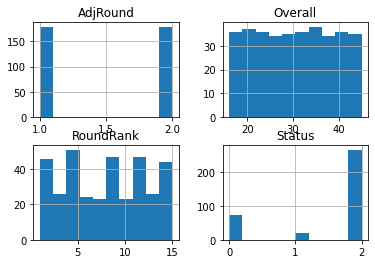

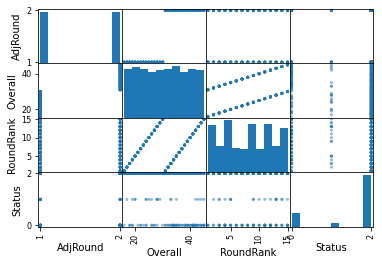

In [19]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

# histograms to see the distributon of our input variables
data[["AdjRound", "Overall", "RoundRank", "Status"]].hist()
pyplot.show()

# scatter plot matrix for observing relationships between input features
scatter_matrix(data[["AdjRound", "Overall", "RoundRank", "Status"]])
pyplot.show()

#### As expected, because our data is very orderly, meaning that other than our removed goaltenders, there's the same amount of players chosen at each pick and each round, we do not see anything that stands out within our input variables
#### Most of the input variables are based off each other as well, which is why we see a lot of linear lines in our scatter matrix

#### So we'll go ahead and use some common algorithms

#### For our Data, Classification models will fit the best

In [20]:
# Import more libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

#### What we will do now is apply a Stratified k-fold Cross Validation with 10 folds (k = 10).
#### What this is is it will split the training data into k=10 subsets called folds. Then, it will test our model 10 times, with each of the subsets taking turns being the "test" fold, while the other 9 folds are used for training our model.
#### The mean, and standard deviation of the 10 results will then be calculated, with the mean being the accuracy percentage of our model, and the standard deviation representing how much variance there could be in our accuracy

### We will start by training our model to predict a player's "Level"

In [21]:
# Model to Run (Name, Model)
models_clas = []
models_clas.append(("GNB", GaussianNB()))
models_clas.append(("KNN", KNeighborsClassifier(n_neighbors=3)))
models_clas.append(("LDA", LinearDiscriminantAnalysis()))
models_clas.append(("LR", LogisticRegression(solver="liblinear", multi_class="ovr")))
models_clas.append(("CART", DecisionTreeClassifier()))
models_clas.append(("LINSVC", LinearSVC(random_state=0, tol=1e-5)))
models_clas.append(("SVC", SVC()))
models_clas.append(("SVCKLIN", SVC(kernel="linear", gamma="scale")))
models_clas.append(("BAG", BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)))
models_clas.append(("RANDF", RandomForestClassifier(n_estimators=100)))

# Evaluate and print the accuracy of each model
results = []
names = []

print("\nMetrics Accuracy Score: ")
for name, model in models_clas:
    model.fit(X_train, y_lvl_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_lvl_test, y_pred)
    print("Model: %s | Score: %f" % (name, score))
    
print("\n\nK-Fold: ")
for name, model in models_clas:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_lvl_train, cv=kfold, scoring="accuracy") # Notice y_lvl_train
    results.append(cv_results) # cv = Cross Validation
    names.append(name)
    print("Model: %s -->  Mean Accuracy: %f | Std Deviation: (%f)" % (name, cv_results.mean(), cv_results.std()))
print("\nScale from 0 to 1")


Metrics Accuracy Score: 
Model: GNB | Score: 0.513889
Model: KNN | Score: 0.472222
Model: LDA | Score: 0.541667
Model: LR | Score: 0.527778
Model: CART | Score: 0.500000
Model: LINSVC | Score: 0.527778
Model: SVC | Score: 0.527778
Model: SVCKLIN | Score: 0.541667
Model: BAG | Score: 0.555556
Model: RANDF | Score: 0.472222


K-Fold: 
Model: GNB -->  Mean Accuracy: 0.498276 | Std Deviation: (0.050580)
Model: KNN -->  Mean Accuracy: 0.439039 | Std Deviation: (0.076751)
Model: LDA -->  Mean Accuracy: 0.505049 | Std Deviation: (0.038171)
Model: LR -->  Mean Accuracy: 0.498276 | Std Deviation: (0.029604)
Model: CART -->  Mean Accuracy: 0.453079 | Std Deviation: (0.071117)
Model: LINSVC -->  Mean Accuracy: 0.494828 | Std Deviation: (0.024795)
Model: SVC -->  Mean Accuracy: 0.515887 | Std Deviation: (0.035319)
Model: SVCKLIN -->  Mean Accuracy: 0.505172 | Std Deviation: (0.033021)
Model: BAG -->  Mean Accuracy: 0.470197 | Std Deviation: (0.082600)
Model: RANDF -->  Mean Accuracy: 0.459852 | S

### We can see that our SVC with linear kernel (SVCKLIN) performed the best, correctly predicting the Level of our players based on Overall Pick, Round # ~51% of the time!

In [22]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

print("\nSeasons: ")
for name, model in models_clas:
    cv_results = cross_val_score(model, X_train, y_Szn_train, cv=kfold, scoring="accuracy") # Notice y_lvl_train
    print("Model: %s -->  Mean Accuracy: %f | Std Deviation: (%f)" % (name, cv_results.mean(), cv_results.std()))

print("\nGames Played: ")
for name, model in models_clas:
    cv_results = cross_val_score(model, X_train, y_GP_train, cv=kfold, scoring="accuracy") # Notice y_lvl_train
    print("Model: %s -->  Mean Accuracy: %f | Std Deviation: (%f)" % (name, cv_results.mean(), cv_results.std()))
print("\nScale from 0 to 1")


Seasons: 
Model: GNB -->  Mean Accuracy: 0.277217 | Std Deviation: (0.032483)
Model: KNN -->  Mean Accuracy: 0.396552 | Std Deviation: (0.070219)
Model: LDA -->  Mean Accuracy: 0.466626 | Std Deviation: (0.012172)
Model: LR -->  Mean Accuracy: 0.466626 | Std Deviation: (0.012172)
Model: CART -->  Mean Accuracy: 0.435222 | Std Deviation: (0.053577)
Model: LINSVC -->  Mean Accuracy: 0.466626 | Std Deviation: (0.012172)
Model: SVC -->  Mean Accuracy: 0.466626 | Std Deviation: (0.012172)
Model: SVCKLIN -->  Mean Accuracy: 0.466626 | Std Deviation: (0.012172)
Model: BAG -->  Mean Accuracy: 0.463054 | Std Deviation: (0.027795)
Model: RANDF -->  Mean Accuracy: 0.400246 | Std Deviation: (0.077049)

Games Played: 
Model: GNB -->  Mean Accuracy: 0.199877 | Std Deviation: (0.014225)
Model: KNN -->  Mean Accuracy: 0.199877 | Std Deviation: (0.014225)
Model: LDA -->  Mean Accuracy: 0.224507 | Std Deviation: (0.022568)
Model: LR -->  Mean Accuracy: 0.217365 | Std Deviation: (0.029316)
Model: CART -

### Evaluating our SVCKLIN

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score

svcklin = SVC(kernel="linear", gamma="scale")
y_pred = cross_val_predict(svcklin, X_train, y_lvl_train, cv=10)
display(y_pred)
print(classification_report(y_lvl_train, y_pred))


array([1, 1, 1, 1, 5, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       5, 5, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 5, 0, 1, 1, 0, 1, 5, 1, 1, 1, 1, 1, 5, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 5, 1, 0, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 0, 0, 1, 1, 0, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.36      1.00      0.53        76
           2       0.00      0.00      0.00        35
           3       0.00      0.00      0.00        35
           4       0.00      0.00      0.00        43
           5       0.93      0.33      0.49        39

    accuracy                           0.51       285
   macro avg       0.38      0.39      0.33       285
weighted avg       0.42      0.51      0.41       285



In [24]:
'''
lateryears = pd.read_csv("list06-10.csv") # For comparing 93-05 drafts to 06-10 drafts
lateryears = lateryears[lateryears.Pos != "G"]
lateryears = lateryears[["Team", "Player", "Year", "Round", "Overall", "To", "Age", "GP", "G", "A", "PTS", "+/-", "PIM"]].fillna(0, downcast="infer")
lateryears.loc[lateryears.Age == 0, "Age"] = 18
lateryears['Status'] = lateryears.apply(lambda row: assignStatus(row), axis = 1)
lateryears['Level'] = lateryears.apply(lambda row: assignLvl(row), axis = 1)
lateryears['AdjRound'] = lateryears.apply(lambda row: assignAdjustedRound(row), axis = 1)
lateryears["RoundRank"] = lateryears.apply(lambda row: RankPicksInRound(row), axis = 1)
lateryears['Seasons'] = lateryears.apply(lambda row: assignSeason(row), axis = 1)

column_order = ["Team", "Player", "AdjRound", "Overall", "RoundRank", "Status", "PTS", "GP", "Seasons", "Level"]
lateryears = lateryears[column_order]
display(lateryears)

later_years_X = lateryears[["AdjRound", "Overall", "RoundRank", "Status"]]
later_years_train_minmax = min_max_scaler.fit_transform(later_years_X)

# Convert back to pandas DataFrame, because sklearn converts the data into a Numpy class
X_train = pd.DataFrame(later_years_X, columns = later_years_X.columns)
display(later_years_X.head(5))


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-24-0e1328f217cc>, line 21)